# S&P Sectors Performance

**BACKGROUND**

The business cycle, which reflects the fluctuations of activity in an economy, can be a critical determinant of equity sectors performance over the intermediate term, in which assets performance is often driven largely by cyclical factors tied to the state of the economy, such as corporate earnings, interest rates, and inflation. Depending on the phase of the business cycle—early, mid, late, or recession—certain sectors may be expected to outperform others. While each business cycle is unique, in the past certain sectors have tended to perform well at different phases of the business cycle.

There are 4 distinct phases of a typical business cycle:

**Early-cycle phase:** Generally, a sharp recovery from recession, marked by an inflection from negative to positive growth in economic activity (e.g., gross domestic product, industrial production), then an accelerating growth rate. Credit conditions stop tightening amid easy monetary policy, creating a healthy environment for rapid profit margin expansion and profit growth. Business inventories are low, while sales growth improves significantly.

**Mid-cycle phase:** Typically the longest phase of the business cycle, the mid-cycle is characterized by a positive but more moderate rate of growth than that experienced during the early-cycle phase. Economic activity gathers momentum, credit growth becomes strong, and profitability is healthy against an accommodative though increasingly neutral monetary policy backdrop. Inventories and sales grow, reaching equilibrium relative to each other.

**Late-cycle phase:** This phase is emblematic of an "overheated" economy poised to slip into recession and hindered by above-trend rates of inflation. Economic growth rates slow to "stall speed" against a backdrop of restrictive monetary policy, tightening credit availability, and deteriorating corporate profit margins. Inventories tend to build unexpectedly as sales growth declines.

**Recession phase:** Features a contraction in economic activity. Corporate profits decline and credit is scarce for all economic factors. Monetary policy becomes more accommodative and inventories gradually fall despite low sales levels, setting up for the next recovery.

**RATIONALE**

Aim of this notebook is to provide evidence about the S&P 500 underlying sectors performance across the last 10 years and Year-to-Date showing how these correlate and where these are currently trading compared to their respective 50 and 200 period moving averages.

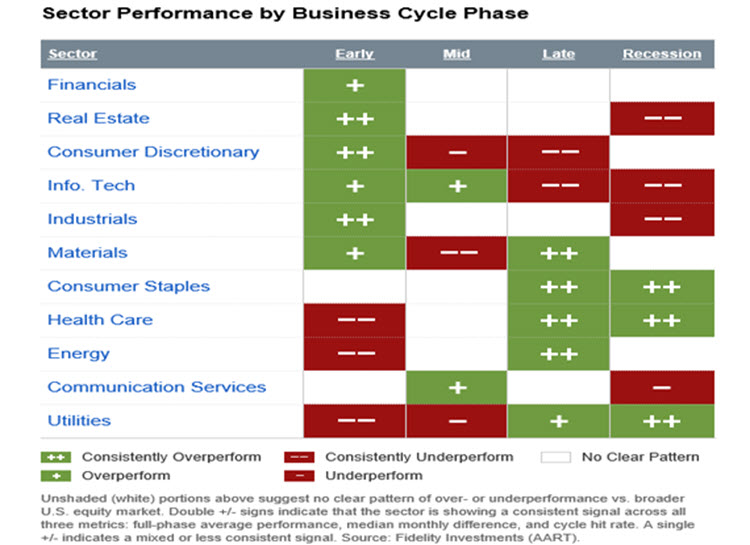

In [1]:
from IPython.display import Image
Image(data='datasets/SectorRotation.jpg')

### 1. Import Libriaries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import matplotlib.ticker as mtick
from dateutil.relativedelta import relativedelta

### 2. Tickers Selection
Last 10 year price of S&P500 and its 11 sectors will be collected from Yahoo Finance.

In [3]:
tickers = ['^GSPC','^GSPE','^SP500-15','^SP500-20','^SP500-25','^SP500-30',
          '^SP500-35','^SP500-40','^SP500-45','^SP500-50','^SP500-55','^SP500-60']

names = ['S&P500','Energy','Materials','Industrials','Consumer Discretionary','Consumer Staples',
         'HealthCare','Financials','Information Technology','Communication Services','Utilities','Real Estate']

### 3. Import Data

In [4]:
start_date = datetime.today() - relativedelta(years=10)

In [5]:
dataset = pdr.DataReader(tickers,data_source='yahoo',start=start_date).Close.set_axis(names, axis=1)

### 4. Data Analysis

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-11-16 to 2022-11-15
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S&P500                  2517 non-null   float64
 1   Energy                  2517 non-null   float64
 2   Materials               2514 non-null   float64
 3   Industrials             2514 non-null   float64
 4   Consumer Discretionary  2514 non-null   float64
 5   Consumer Staples        2514 non-null   float64
 6   HealthCare              2514 non-null   float64
 7   Financials              2514 non-null   float64
 8   Information Technology  2514 non-null   float64
 9   Communication Services  2514 non-null   float64
 10  Utilities               2514 non-null   float64
 11  Real Estate             2392 non-null   float64
dtypes: float64(12)
memory usage: 255.6 KB


In [7]:
dataset.isnull().sum(axis=0)

S&P500                      0
Energy                      0
Materials                   3
Industrials                 3
Consumer Discretionary      3
Consumer Staples            3
HealthCare                  3
Financials                  3
Information Technology      3
Communication Services      3
Utilities                   3
Real Estate               125
dtype: int64

In [8]:
null_values = dataset['Real Estate'][dataset['Real Estate'].isnull() == True]
print(f'Real Estate time series missing values range: From {null_values.index.astype(str).min()} to {null_values.index.astype(str).max()}')

Real Estate time series missing values range: From 2017-03-02 to 2018-08-29


Missing data will be filled propagating forward the last valid observations untill the next valid datapoint

In [9]:
price = dataset.fillna(method='ffill')

### 5. Data Plot

In [10]:
price_100 = price/price.iloc[0] * 100 - 100
price_ytd = price.loc['2021-12-31':]/price.loc['2021-12-31'] * 100 - 100

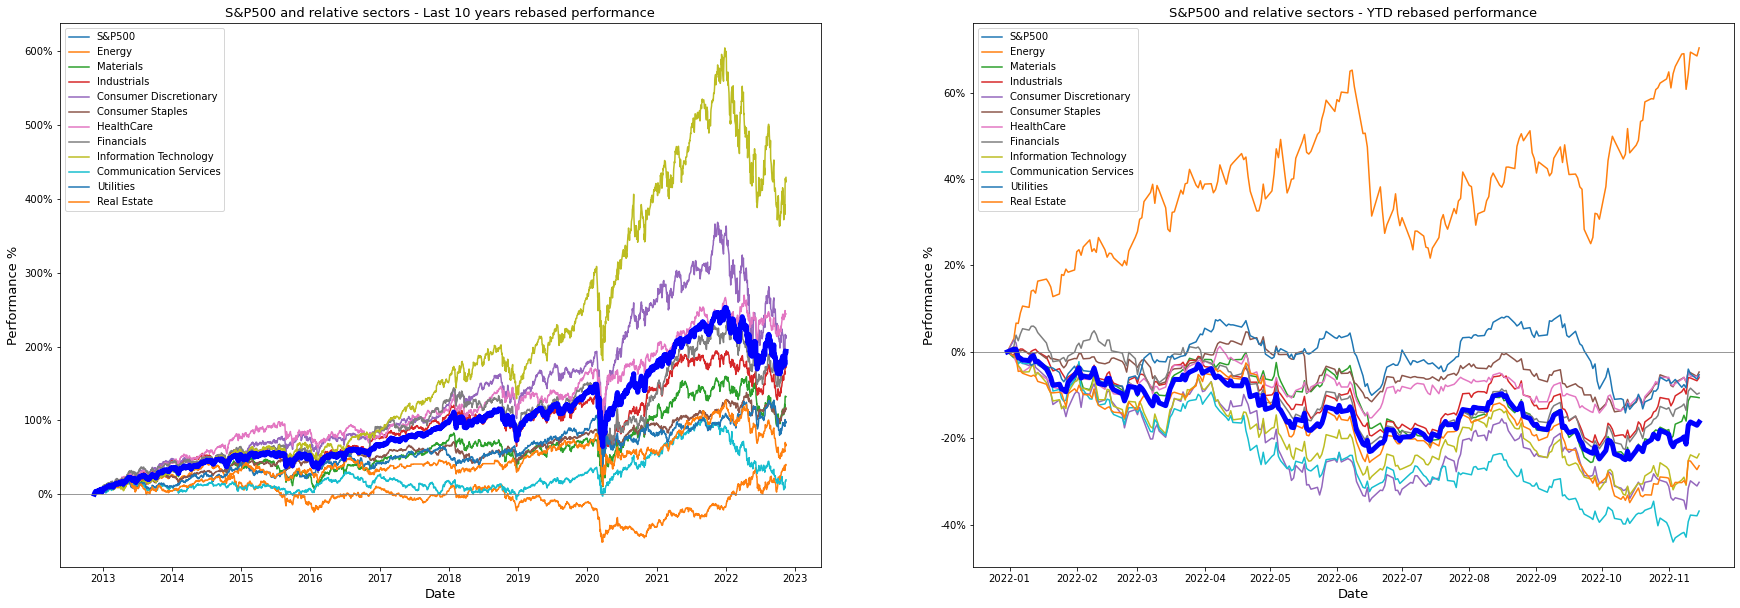

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(30,10))
axs[0].plot(price_100)
axs[0].plot(price_100['S&P500'],lw=5,c='b')
axs[1].plot(price_ytd)
axs[1].plot(price_ytd['S&P500'],lw=5,c='b')

axs[0].axhline(y=0, color='grey', linewidth=0.8)
axs[1].axhline(y=0, color='grey', linewidth=0.8)

axs[0].set_title('S&P500 and relative sectors - Last 10 years rebased performance',fontsize=13)
axs[1].set_title('S&P500 and relative sectors - YTD rebased performance',fontsize=13)

axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[1].yaxis.set_major_formatter(mtick.PercentFormatter())

axs[0].legend(price_100.columns.to_list())
axs[1].legend(price_100.columns.to_list())

axs[0].set_xlabel('Date',fontsize=13)
axs[0].set_ylabel('Performance %',fontsize=13)
axs[1].set_xlabel('Date',fontsize=13)
axs[1].set_ylabel('Performance %',fontsize=13);

In [12]:
performance = pd.DataFrame()
performance['Last 10y %'] = price_100.T.iloc[:,-1].round(2)
performance['YTD %'] = (price_ytd.tail(1).T).round(2)
performance

,Last 10y %,YTD %
S&P500,193.54,-16.25
Energy,40.01,70.36
Materials,132.10,-10.61
Industrials,173.44,-5.96
Consumer Discretionary,214.90,-30.18
Consumer Staples,116.63,-4.66
HealthCare,244.25,-5.72
Financials,186.44,-9.54
Information Technology,429.29,-23.63
Communication Services,19.46,-36.83


In [13]:
rets = price.pct_change().dropna()
corr = rets.corr()
rets_ytd = price['31-12-2020':].pct_change().dropna()
corr_ytd = rets_ytd.corr()

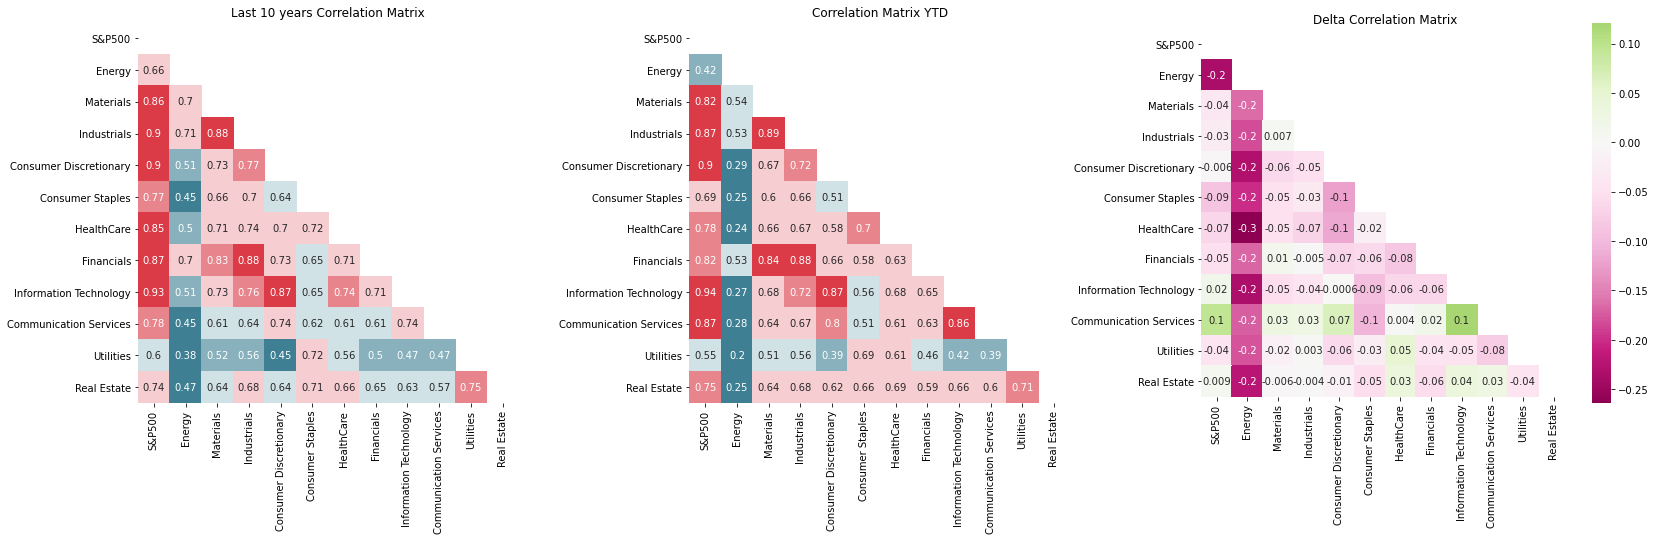

In [14]:
plt.figure(figsize=(28,7))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_ytd[mask] = np.nan
corr[mask] = np.nan
plt.subplot(1,3,1) 
sns.heatmap(corr, mask=np.zeros_like(corr_ytd, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=False), square=True, annot=True, cbar=False)
plt.title('Last 10 years Correlation Matrix')
plt.subplot(1,3,2)
sns.heatmap(corr_ytd, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=False), square=True, annot=True, cbar=False)
plt.title('Correlation Matrix YTD')
plt.subplot(1,3,3)
sns.heatmap(corr_ytd-corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='PiYG', square=True, annot=True, fmt='.1g', cbar=True, center=0)
plt.title('Delta Correlation Matrix');

The charts above show the Year-to-Date sectors Correlation Matrix compared to the historical 10 years correlations. The Last chart, which depicts the correlation difference between those two time frames, clearly highlights the Energy sector as an outlier, as it has been experiencing an evident reduction in correlation compared to all the other segments. The first historical Correlation Matrix also confirms the defensive role the Utilities sector has in a portfolio construction process, given its relatively low correlation with other sectors.

In [15]:
start = '2019-01-01'
SMA200 = price.rolling(200).mean()
SMA50 = price.rolling(50).mean()

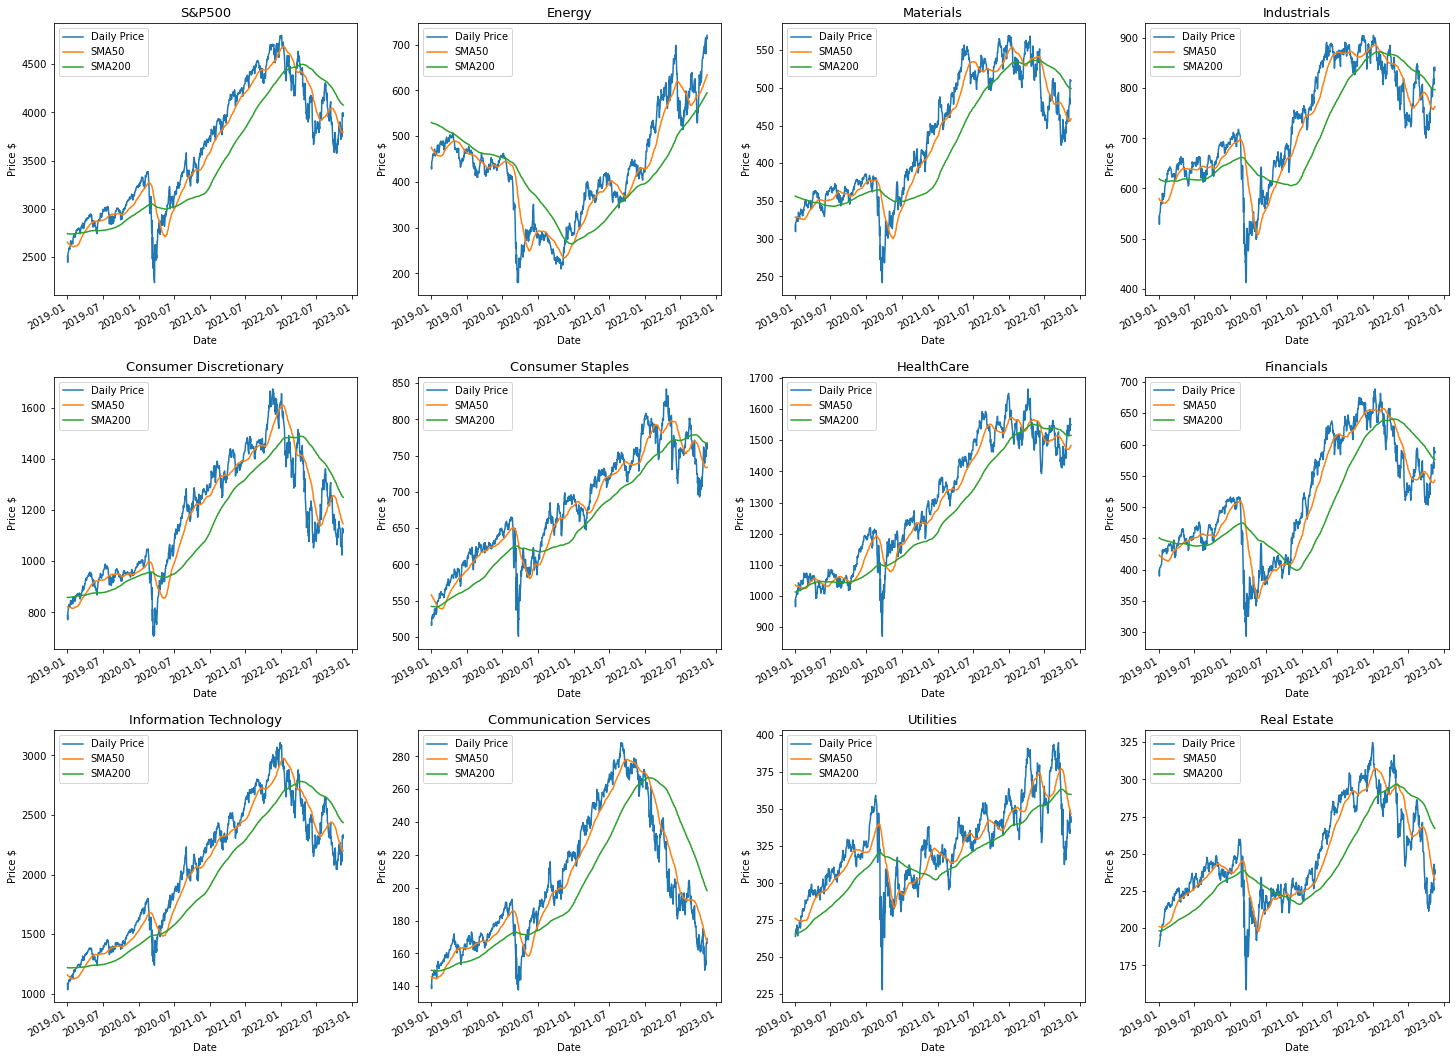

In [16]:
i = 1
plt.figure(figsize=(25,20))

for name in names:
    plt.subplot(3,4,i)
    plt.subplots_adjust(hspace=0.3)
    price[name][start:].plot()
    SMA50[name][start:].plot()
    SMA200[name][start:].plot()
    plt.ylabel('Price $')
    plt.title(name,fontsize=13)
    plt.legend(['Daily Price','SMA50','SMA200'])
    i += 1

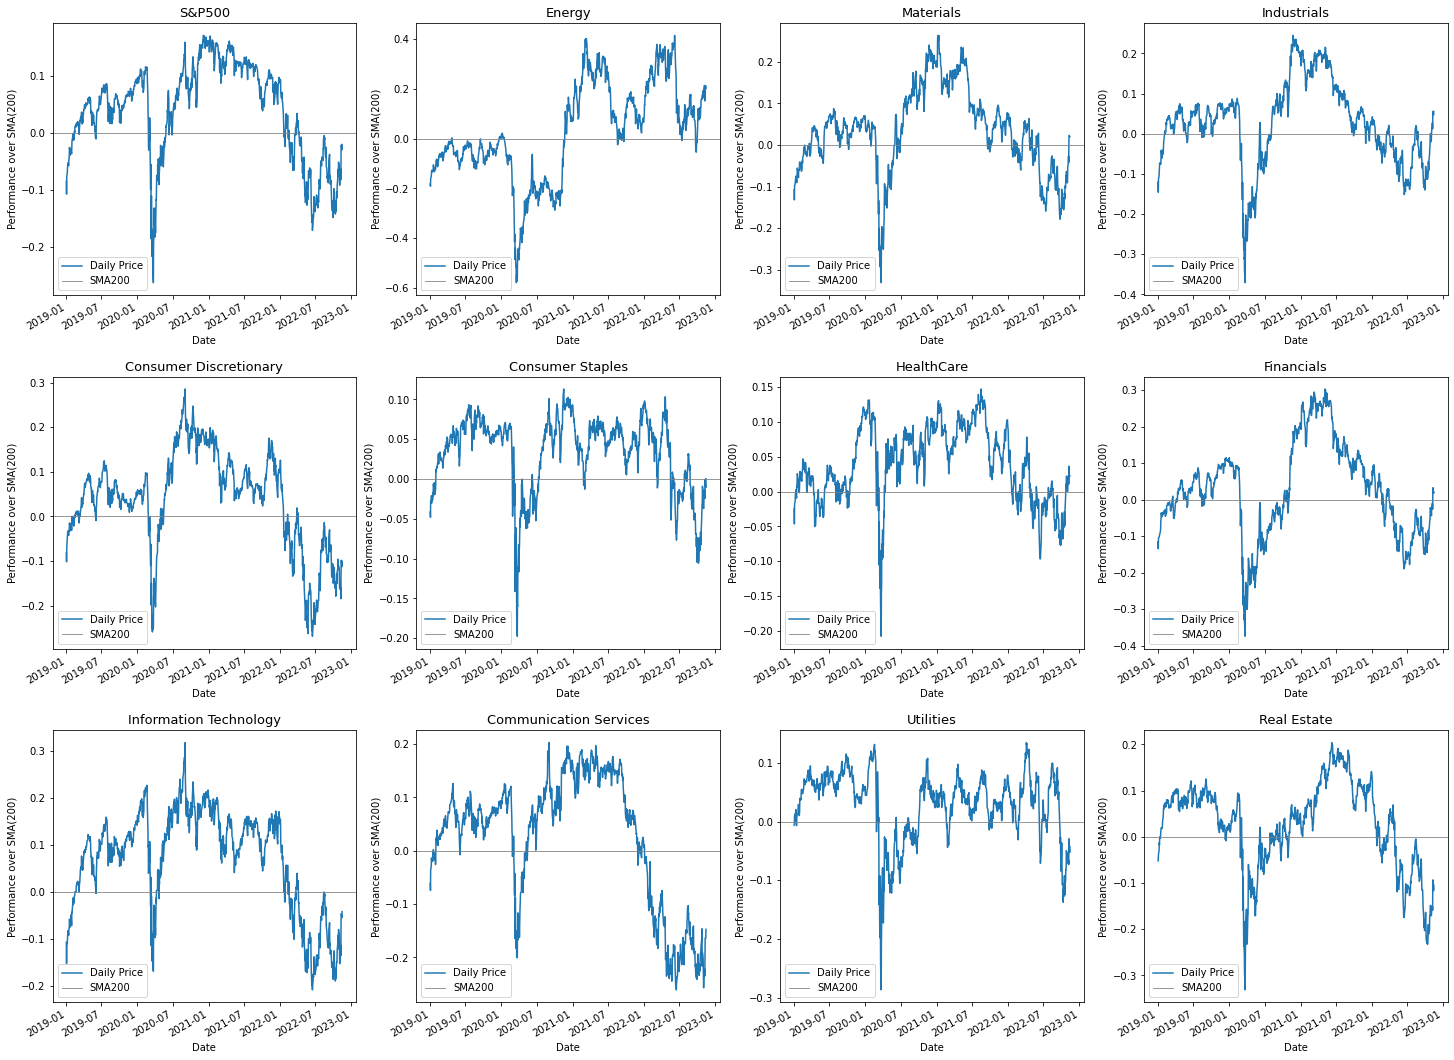

In [17]:
momentum_200 = (price/SMA200)-1
momentum_50 = (price/SMA50)-1
i = 1

plt.figure(figsize=(25,20))
for name in names:
    plt.subplot(3,4,i)
    plt.subplots_adjust(hspace=0.3)
    momentum_200[name][start:].plot()
    plt.axhline(y=0,c='grey', linewidth=0.8)
    plt.ylabel('Performance over SMA(200)')
    plt.title(name, fontsize=13)
    plt.legend(['Daily Price','SMA200'],loc=3)
    i += 1

### 6. Conclusions

In [18]:
date = momentum_200.tail(1).index.astype(str)[0]
SPX = performance.loc['S&P500'][0]
SPX_YTD = performance.loc['S&P500'][1]
top_LT = performance[performance.iloc[:,0] == performance.iloc[:,0].max()].index[0]
top_LT_ret = performance.iloc[:,0].max()
worst_LT = performance[performance.iloc[:,0] == performance.iloc[:,0].min()].index[0]
worst_LT_ret = performance.iloc[:,0].min()
top_YTD = performance[performance.iloc[:,1] == performance.iloc[:,1].max()].index[0]
top_YTD_ret = performance.iloc[:,1].max()
worst_YTD = performance[performance.iloc[:,1] == performance.iloc[:,1].min()].index[0]
worst_YTD_ret = performance.iloc[:,1].min()
above_50 = momentum_50.drop('S&P500',axis=1).T[date][momentum_50.T[date] > 0].count()
above_200 = momentum_200.drop('S&P500',axis=1).T[date][momentum_200.T[date] > 0].count()

In [19]:
print(f'As of {date}, during the last 10 years the S&P 500 delivered a return of {SPX}%. During the same period, the best performing sector was {top_LT}, returning {top_LT_ret}% while the worst one was {worst_LT}, returning {worst_LT_ret}%. Year to date, the best performing sector was instead {top_YTD} ({top_YTD_ret}%) while the worst one was {worst_YTD}({worst_YTD_ret}%) while the S&P 500 delivered a return of {SPX_YTD}%. To date, {above_50} and {above_200} over the 11 segments under assessment traded above the SMA(50) and SMA(200) respectively.')

As of 2022-11-15, during the last 10 years the S&P 500 delivered a return of 193.54%. During the same period, the best performing sector was Information Technology, returning 429.29% while the worst one was Communication Services, returning 19.46%. Year to date, the best performing sector was instead Energy (70.36%) while the worst one was Communication Services(-36.83%) while the S&P 500 delivered a return of -16.25%. To date, 9 and 6 over the 11 segments under assessment traded above the SMA(50) and SMA(200) respectively.
